# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [134]:
import numpy as np
import pandas as pd
seed = 42
np.random.seed(seed)
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [135]:
df2 = pd.read_csv("C:\RTA_Dataset.csv")

In [136]:
df1 = pd.read_csv("C:\RTA_Dataset.csv")

In [137]:
df = pd.read_csv("C:\RTA_Dataset.csv")

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [139]:
df.describe() 

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


check_null = df.isnull().any(axis=1)
null = df[check_null]

print(null)




In [140]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [141]:
df.dropna(inplace=True)
df1.dropna(inplace=True)
df2.dropna(inplace=True)

In [142]:

df.dropna(subset = ['Defect_of_vehicle'] ,inplace=True)


df.dropna(subset = ['Work_of_casuality'] ,inplace=True)

df.dropna(subset = ['Service_year_of_vehicle'] ,inplace=True)

In [143]:
df.duplicated().sum()

0

In [144]:
df.drop_duplicates(inplace=True)

sns.boxplot(x=df[])

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2889 entries, 8 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         2889 non-null   object
 1   Day_of_week                  2889 non-null   object
 2   Age_band_of_driver           2889 non-null   object
 3   Sex_of_driver                2889 non-null   object
 4   Educational_level            2889 non-null   object
 5   Vehicle_driver_relation      2889 non-null   object
 6   Driving_experience           2889 non-null   object
 7   Type_of_vehicle              2889 non-null   object
 8   Owner_of_vehicle             2889 non-null   object
 9   Service_year_of_vehicle      2889 non-null   object
 10  Defect_of_vehicle            2889 non-null   object
 11  Area_accident_occured        2889 non-null   object
 12  Lanes_or_Medians             2889 non-null   object
 13  Road_allignment              288

In [117]:
import numpy as np

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]



In [118]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['All_Age_band_of_driver'] = label_encoder.fit_transform(df['Age_band_of_driver'])

df.head(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,All_Age_band_of_driver
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury,0
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury,0
12,17:45:00,Thursday,18-30,Male,Junior high school,Employee,1-2yr,Public (> 45 seats),Owner,2-5yrs,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,0
13,17:45:00,Thursday,31-50,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,Above 10yr,...,na,na,na,na,Other,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury,1
14,17:45:00,Thursday,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,1-2yr,...,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury,1
19,8:20:00,Tuesday,18-30,Male,Junior high school,Employee,Below 1yr,Long lorry,Owner,5-10yrs,...,Driver or rider,Male,Under 18,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury,0
21,15:10:00,Thursday,18-30,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,5-10yrs,...,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Overtaking,Serious Injury,0
25,18:36:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Taxi,Owner,Above 10yr,...,Driver or rider,Female,31-50,3,Self-employed,Normal,Not a Pedestrian,Other,Slight Injury,0
27,14:35:00,Friday,18-30,Male,Above high school,Employee,2-5yr,Automobile,Owner,2-5yrs,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,0
34,13:57:00,Saturday,Over 51,Male,Junior high school,Employee,Below 1yr,Automobile,Owner,1-2yr,...,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury,2


<AxesSubplot:>

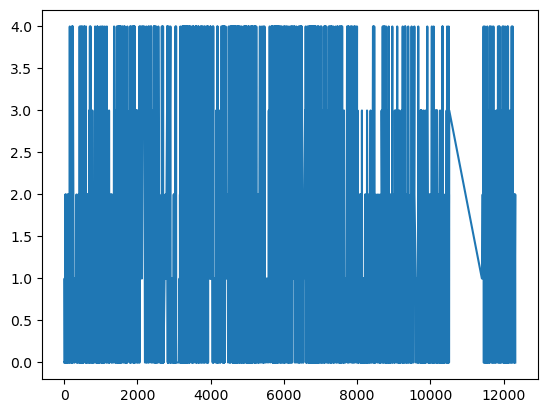

In [119]:
df['All_Age_band_of_driver'].plot.line()

In [120]:
df = pd.get_dummies(df,columns=['Sex_of_driver'])

In [121]:
df = pd.get_dummies(df,columns=['Day_of_week'])

In [122]:
df = pd.get_dummies(df,columns=['Age_band_of_driver'])

In [123]:
df = pd.get_dummies(df,columns=['Accident_severity'])

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

<AxesSubplot:>

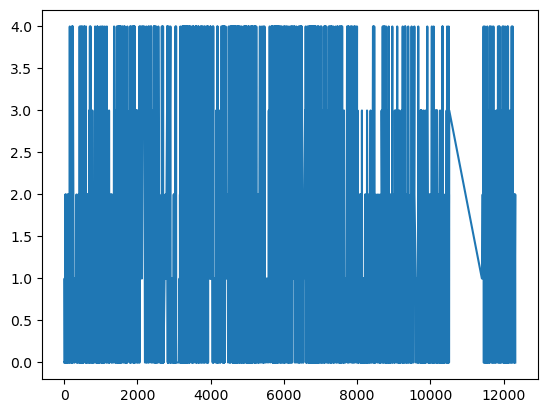

In [124]:
df['All_Age_band_of_driver'].plot.line()

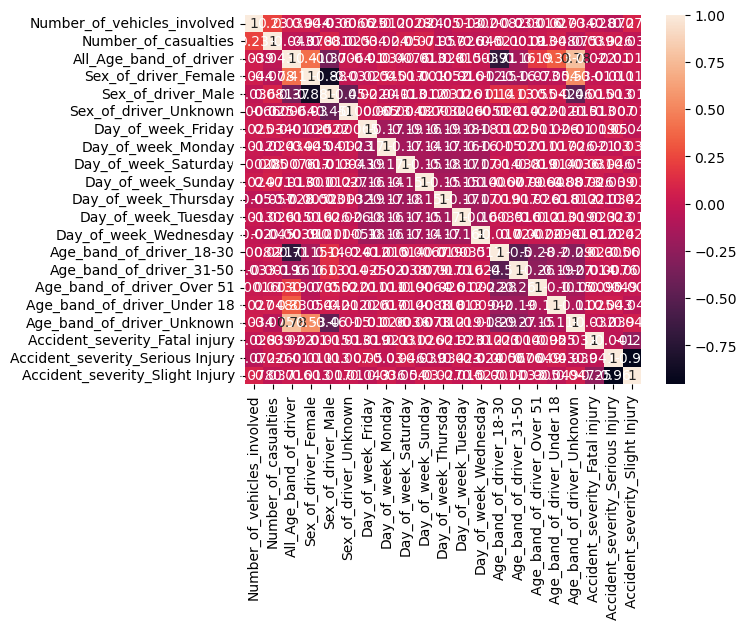

In [125]:
import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = df.corr()

sn.heatmap(corr_matrix, annot=True)
plt.show()
#heat map for explain all relashionship between coulm

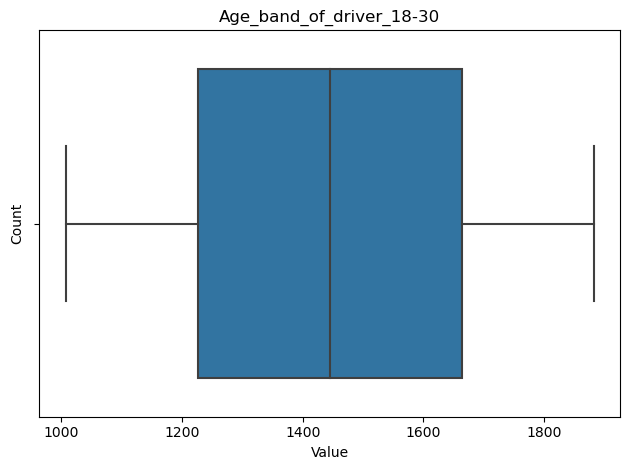

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['Age_band_of_driver_18-30'].value_counts())
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Age_band_of_driver_18-30')
plt.tight_layout()
plt.show()

# the number for driver is between 1200 and 1600, and mode is in 1400

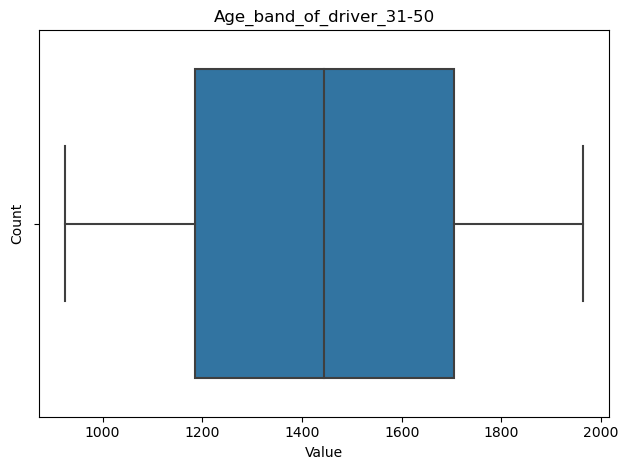

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['Age_band_of_driver_31-50'].value_counts())
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Age_band_of_driver_31-50')
plt.tight_layout()
plt.show()
# the value for Age_band_of_driver_31-50 is between 1200 and 1800 that number for driver between 31-50

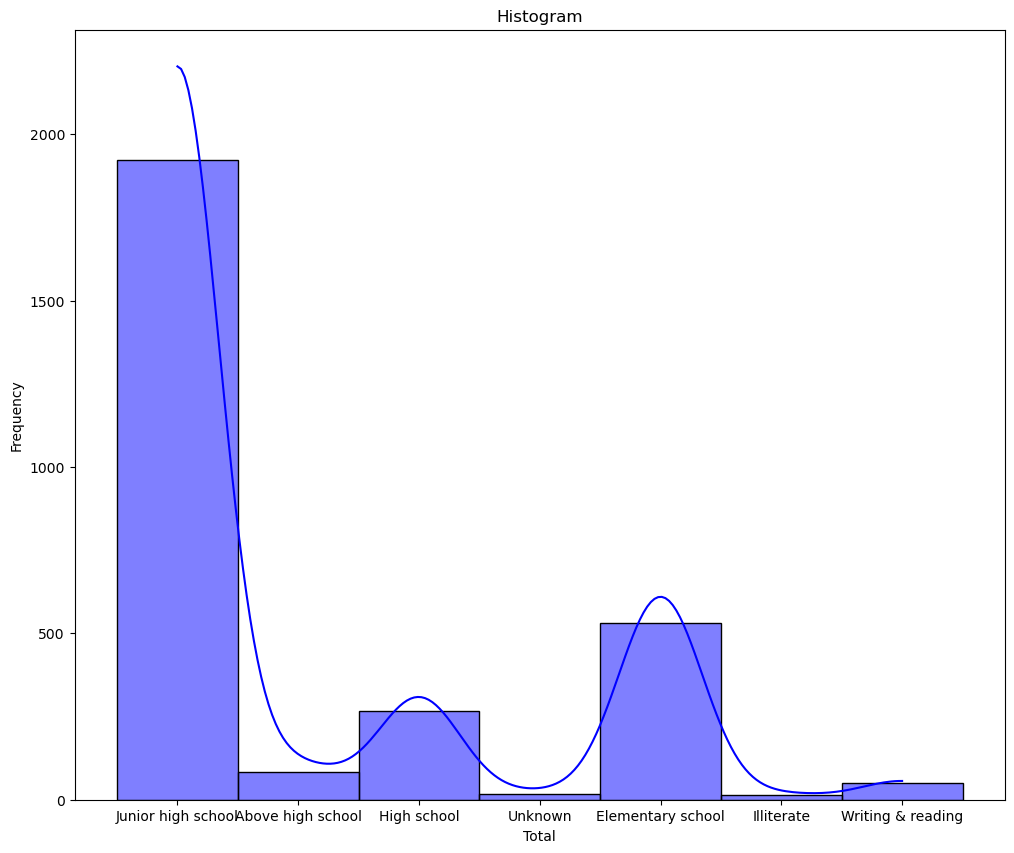

In [132]:
plt.figure(figsize=(12, 10))
sns.histplot(df['Educational_level'], kde=True, bins=20, color='blue')
plt.title('Histogram')
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.show()
# peploee in high school is high, that mean is the highst driver in high school

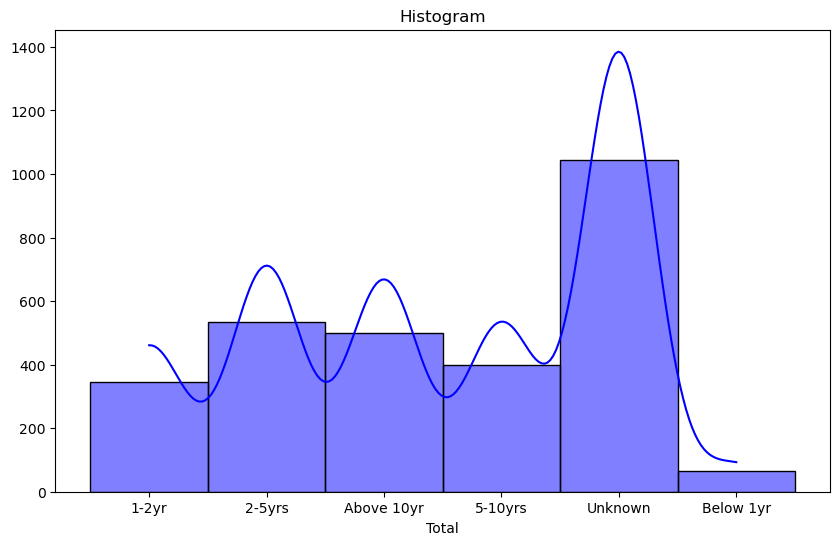

In [133]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Service_year_of_vehicle'], kde=True, bins=20, color='blue')
plt.title('Histogram')
plt.xlabel('Total')
plt.ylabel('')
plt.show()
# the cae service above 10y is highst maybe that reasin for trafic

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


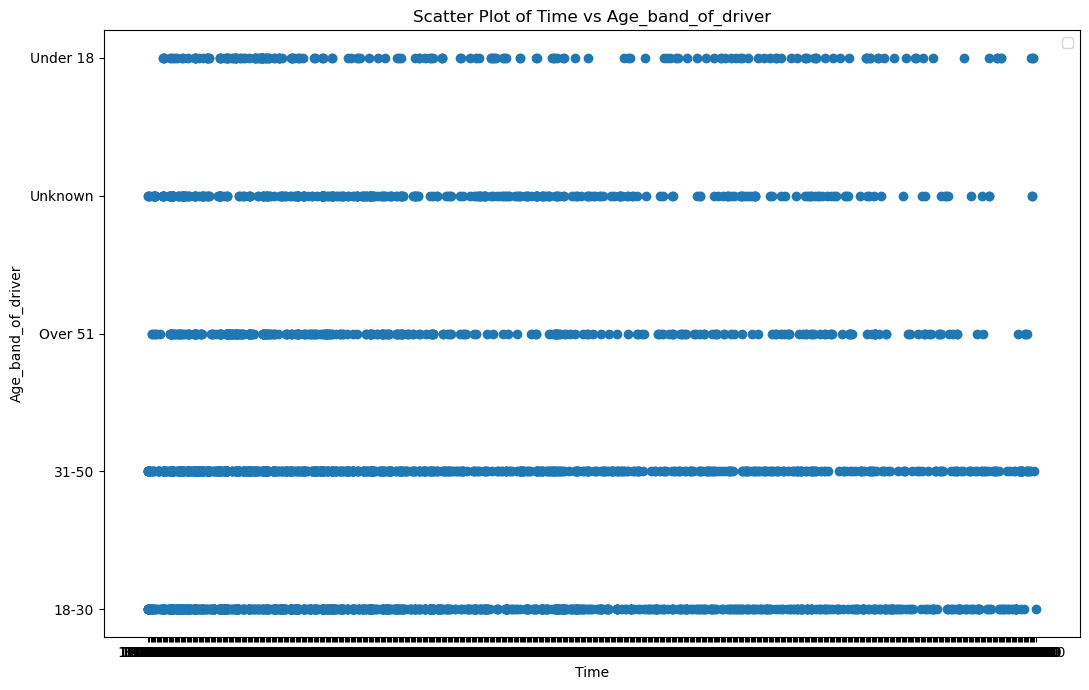

In [130]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(11, 7))

ax.scatter(df1['Time'], df1['Age_band_of_driver'])

ax.set_xlabel('Time')
ax.set_ylabel('Age_band_of_driver')
ax.set_title('Scatter Plot of Time vs Age_band_of_driver')

ax.legend()

plt.tight_layout()
plt.show()
#that figure explain the value for hight school i explain before

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [31]:
X = df1.drop('Number_of_casualties', axis=1)
df1.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury
12,17:45:00,Thursday,18-30,Male,Junior high school,Employee,1-2yr,Public (> 45 seats),Owner,2-5yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
13,17:45:00,Thursday,31-50,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,Above 10yr,...,Waiting to go,na,na,na,na,Other,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
14,17:45:00,Thursday,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,1-2yr,...,Going straight,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2889 entries, 8 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         2889 non-null   object
 1   Day_of_week                  2889 non-null   object
 2   Age_band_of_driver           2889 non-null   object
 3   Sex_of_driver                2889 non-null   object
 4   Educational_level            2889 non-null   object
 5   Vehicle_driver_relation      2889 non-null   object
 6   Driving_experience           2889 non-null   object
 7   Type_of_vehicle              2889 non-null   object
 8   Owner_of_vehicle             2889 non-null   object
 9   Service_year_of_vehicle      2889 non-null   object
 10  Defect_of_vehicle            2889 non-null   object
 11  Area_accident_occured        2889 non-null   object
 12  Lanes_or_Medians             2889 non-null   object
 13  Road_allignment              288

In [40]:
Y = df1['Number_of_casualties']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

In [44]:
numeric_features = ['Number_of_vehicles_involved']
numeric_transformer = Pipeline(
    steps=[ ("imputer", SimpleImputer(strategy="mean")),
           ("scaler", StandardScaler())] )

categorical_features = ["Time",'Accident_severity','Cause_of_accident','Pedestrian_movement','Fitness_of_casuality',
                        'Work_of_casuality', 
                        'Casualty_severity','Age_band_of_casualty','Sex_of_casualty','Casualty_class','Vehicle_movement',
                        'Type_of_collision',
                        'Weather_conditions','Light_conditions' ,'Road_surface_conditions','Road_surface_type',
                        'Types_of_Junction','Road_allignment','Lanes_or_Medians','Area_accident_occured','Defect_of_vehicle',
                        'Service_year_of_vehicle','Owner_of_vehicle','Type_of_vehicle','Driving_experience',
                        'Vehicle_driver_relation',
                        'Educational_level','Sex_of_driver','Age_band_of_driver']
categorical_transformer = Pipeline( 
    steps=[ ('imputer', SimpleImputer(strategy='most_frequent')),
           ("encoder", OneHotEncoder(handle_unknown="ignore")), ] )

preprocessor = ColumnTransformer( 
    transformers=[ ("num", numeric_transformer, numeric_features),
                  ("cat", categorical_transformer, categorical_features), ] )

from sklearn.linear_model import LogisticRegression
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression()),
    ]
)

#### Logistic Regression

In [45]:
model.fit(x_train, y_train)

C:\Users\ByLix\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Number_of_vehicles_involved']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Time', 'Accident_severity',
                                                   'Cause_of_accide...
                                                   'Road_surface_conditions',
                                                   'Road_surface_type',
                                                   'Types_of_Junction',
                                                   'Road_allignment',
                                                   'Lanes_or_Medians',
                                                   'Area_accident_occured',
                                                   'Defect_of_vehicle',
                                                   'Service_year_of_vehicle',
                                                   'Owner_of_vehicle',
                                                   'Type_of_vehicle',
                                                   'Driving_experience',
                                                   'Vehicle_driver_relation',
                                                   'Educational_level',
                                                   'Sex_of_driver',
                                                   'Age_band_of_driver'])])),
                ('classifier', LogisticRegression())])

In [46]:
y_pred = model.predict(x_test)

In [47]:
y_pred

array([1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 2, 1, 1, 1, 1,
       2, 1, 2, 1, 3, 6, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 5,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 4, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred) 

mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False) 
  
print("MAE:",mae) 
print("MSE:",mse) 
print("RMSE:",rmse)

MAE: 0.5467128027681661
MSE: 1.3598615916955017
RMSE: 1.166131035388177


C:\Users\ByLix\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Decision Tree Classifier

In [50]:
df1 = pd.get_dummies(df1,columns=['Sex_of_driver'])

In [51]:
X = df1.drop('Sex_of_driver_Female', axis=1)

In [52]:
Y = df1['Sex_of_driver_Female']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

In [54]:
numeric_features = ['Number_of_vehicles_involved','Number_of_casualties']
numeric_transformer = Pipeline(
    steps=[ ("imputer", SimpleImputer(strategy="mean")),
           ("scaler", StandardScaler())] )

categorical_features = ['Time','Accident_severity','Cause_of_accident','Pedestrian_movement','Fitness_of_casuality',
                        'Work_of_casuality', 
                        'Casualty_severity','Age_band_of_casualty','Sex_of_casualty','Casualty_class','Vehicle_movement',
                        'Type_of_collision',
                        'Weather_conditions','Light_conditions' ,'Road_surface_conditions','Road_surface_type',
                        'Types_of_Junction','Road_allignment','Lanes_or_Medians','Area_accident_occured','Defect_of_vehicle',
                        'Service_year_of_vehicle','Owner_of_vehicle','Type_of_vehicle','Driving_experience',
                        'Vehicle_driver_relation',
                        'Educational_level','Age_band_of_driver']
categorical_transformer = Pipeline( 
    steps=[ ('imputer', SimpleImputer(strategy='most_frequent')),
           ("encoder", OneHotEncoder(handle_unknown="ignore")), ] )

preprocessor = ColumnTransformer( 
    transformers=[ ("num", numeric_transformer, numeric_features),
                  ("cat", categorical_transformer, categorical_features), ] )

from sklearn.linear_model import LogisticRegression
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", DecisionTreeClassifier()),
    ]
)

In [55]:
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Number_of_vehicles_involved',
                                                   'Number_of_casualties']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Time', 'Accident_sev...
                                                   'Light_conditions',
                                                   'Road_surface_conditions',
                                                   'Road_surface_type',
                                                   'Types_of_Junction',
                                                   'Road_allignment',
                                                   'Lanes_or_Medians',
                                                   'Area_accident_occured',
                                                   'Defect_of_vehicle',
                                                   'Service_year_of_vehicle',
                                                   'Owner_of_vehicle',
                                                   'Type_of_vehicle',
                                                   'Driving_experience',
                                                   'Vehicle_driver_relation',
                                                   'Educational_level',
                                                   'Age_band_of_driver'])])),
                ('classifier', DecisionTreeClassifier())])

In [56]:
y_pred = model.predict(x_test)

In [57]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred) 
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False) 
  
print("MAE:",mae) 
print("MSE:",mse) 
print("RMSE:",rmse)

MAE: 8.854671280276817
MSE: 0.0657439446366782
RMSE: 0.2564058202082749


C:\Users\ByLix\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [59]:
numeric_features = ['Number_of_vehicles_involved','Number_of_casualties']
numeric_transformer = Pipeline(
    steps=[ ("imputer", SimpleImputer(strategy="mean")),
           ("scaler", StandardScaler())] )

categorical_features = ['Time','Accident_severity','Cause_of_accident','Pedestrian_movement','Fitness_of_casuality',
                        'Work_of_casuality', 
                        'Casualty_severity','Age_band_of_casualty','Sex_of_casualty','Casualty_class','Vehicle_movement',
                        'Type_of_collision',
                        'Weather_conditions','Light_conditions' ,'Road_surface_conditions','Road_surface_type',
                        'Types_of_Junction','Road_allignment','Lanes_or_Medians','Area_accident_occured','Defect_of_vehicle',
                        'Service_year_of_vehicle','Owner_of_vehicle','Type_of_vehicle','Driving_experience',
                        'Vehicle_driver_relation',
                        'Educational_level','Age_band_of_driver']
categorical_transformer = Pipeline( 
    steps=[ ('imputer', SimpleImputer(strategy='most_frequent')),
           ("encoder", OneHotEncoder(handle_unknown="ignore")), ] )

preprocessor = ColumnTransformer( 
    transformers=[ ("num", numeric_transformer, numeric_features),
                  ("cat", categorical_transformer, categorical_features), ] )

from sklearn.linear_model import LogisticRegression
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", DecisionTreeRegressor()),
    ]
)

In [60]:
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Number_of_vehicles_involved',
                                                   'Number_of_casualties']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Time', 'Accident_sev...
                                                   'Light_conditions',
                                                   'Road_surface_conditions',
                                                   'Road_surface_type',
                                                   'Types_of_Junction',
                                                   'Road_allignment',
                                                   'Lanes_or_Medians',
                                                   'Area_accident_occured',
                                                   'Defect_of_vehicle',
                                                   'Service_year_of_vehicle',
                                                   'Owner_of_vehicle',
                                                   'Type_of_vehicle',
                                                   'Driving_experience',
                                                   'Vehicle_driver_relation',
                                                   'Educational_level',
                                                   'Age_band_of_driver'])])),
                ('classifier', DecisionTreeRegressor())])

In [61]:
y_pred = model.predict(x_test)

In [62]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred) 

mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False) 
  
print("MAE:",mae) 
print("MSE:",mse) 
print("RMSE:",rmse)

MAE: 0.058823529411764705
MSE: 0.058823529411764705
RMSE: 0.24253562503633297


C:\Users\ByLix\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Support Vector Machine (SVM)

In [64]:
numeric_features = ['Number_of_vehicles_involved','Number_of_casualties']
numeric_transformer = Pipeline(
    steps=[ ("imputer", SimpleImputer(strategy="mean")),
           ("scaler", StandardScaler())] )

categorical_features = ['Time','Accident_severity','Cause_of_accident','Pedestrian_movement','Fitness_of_casuality',
                        'Work_of_casuality', 
                        'Casualty_severity','Age_band_of_casualty','Sex_of_casualty','Casualty_class','Vehicle_movement',
                        'Type_of_collision',
                        'Weather_conditions','Light_conditions' ,'Road_surface_conditions','Road_surface_type',
                        'Types_of_Junction','Road_allignment','Lanes_or_Medians','Area_accident_occured','Defect_of_vehicle',
                        'Service_year_of_vehicle','Owner_of_vehicle','Type_of_vehicle','Driving_experience',
                        'Vehicle_driver_relation',
                        'Educational_level','Age_band_of_driver']
categorical_transformer = Pipeline( 
    steps=[ ('imputer', SimpleImputer(strategy='most_frequent')),
           ("encoder", OneHotEncoder(handle_unknown="ignore")), ] )

preprocessor = ColumnTransformer( 
    transformers=[ ("num", numeric_transformer, numeric_features),
                  ("cat", categorical_transformer, categorical_features), ] )

from sklearn.linear_model import LogisticRegression
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", SVC()),
    ]
)

In [65]:
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Number_of_vehicles_involved',
                                                   'Number_of_casualties']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Time', 'Accident_sev...
                                                   'Weather_conditions',
                                                   'Light_conditions',
                                                   'Road_surface_conditions',
                                                   'Road_surface_type',
                                                   'Types_of_Junction',
                                                   'Road_allignment',
                                                   'Lanes_or_Medians',
                                                   'Area_accident_occured',
                                                   'Defect_of_vehicle',
                                                   'Service_year_of_vehicle',
                                                   'Owner_of_vehicle',
                                                   'Type_of_vehicle',
                                                   'Driving_experience',
                                                   'Vehicle_driver_relation',
                                                   'Educational_level',
                                                   'Age_band_of_driver'])])),
                ('classifier', SVC())])

In [66]:
y_pred = model.predict(x_test)

In [67]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [68]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred) 

mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False) 
  
print("MAE:",mae) 
print("MSE:",mse) 
print("RMSE:",rmse)

MAE: 12.352941176470589
MSE: 0.04844290657439446
RMSE: 0.22009749333964362


C:\Users\ByLix\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### K-Neighbors Classifier

In [145]:
X = df1.drop('Number_of_casualties', axis=1)

In [146]:
Y = df1['Number_of_casualties']

In [147]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

In [148]:
numeric_features = ['Number_of_vehicles_involved']
numeric_transformer = Pipeline(
    steps=[ ("imputer", SimpleImputer(strategy="mean")),
           ("scaler", StandardScaler())] )

categorical_features = ['Accident_severity','Cause_of_accident','Pedestrian_movement','Fitness_of_casuality',
                        'Work_of_casuality', 
                        'Casualty_severity','Age_band_of_casualty','Sex_of_casualty','Casualty_class','Vehicle_movement',
                        'Type_of_collision',
                        'Weather_conditions','Light_conditions' ,'Road_surface_conditions','Road_surface_type',
                        'Types_of_Junction','Road_allignment','Lanes_or_Medians','Area_accident_occured','Defect_of_vehicle',
                        'Service_year_of_vehicle','Owner_of_vehicle','Type_of_vehicle','Driving_experience',
                        'Vehicle_driver_relation',
                        'Educational_level','Sex_of_driver','Age_band_of_driver']
categorical_transformer = Pipeline( 
    steps=[ ('imputer', SimpleImputer(strategy='most_frequent')),
           ("encoder", OneHotEncoder(handle_unknown="ignore")), ] )

preprocessor = ColumnTransformer( 
    transformers=[ ("num", numeric_transformer, numeric_features),
                  ("cat", categorical_transformer, categorical_features), ] )

from sklearn.linear_model import LogisticRegression
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression()),
    ]
)

In [149]:
model.fit(x_train, y_train)

C:\Users\ByLix\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Number_of_vehicles_involved']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Accident_severity',
                                                   'Cause_of_accident',
                                                   'Pe...
                                                   'Road_surface_conditions',
                                                   'Road_surface_type',
                                                   'Types_of_Junction',
                                                   'Road_allignment',
                                                   'Lanes_or_Medians',
                                                   'Area_accident_occured',
                                                   'Defect_of_vehicle',
                                                   'Service_year_of_vehicle',
                                                   'Owner_of_vehicle',
                                                   'Type_of_vehicle',
                                                   'Driving_experience',
                                                   'Vehicle_driver_relation',
                                                   'Educational_level',
                                                   'Sex_of_driver',
                                                   'Age_band_of_driver'])])),
                ('classifier', LogisticRegression())])

In [150]:
y_pred = model.predict(x_test)

In [151]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 6, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1,

In [152]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred) 
 
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)  
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False) 
  
print("MAE:",mae) 
print("MSE:",mse) 
print("RMSE:",rmse)

MAE: 0.5916955017301038
MSE: 1.5259515570934257
RMSE: 1.2352941176470589


C:\Users\ByLix\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [641]:
from sklearn.model_selection import cross_val_predict 
y_train_pred = cross_val_predict(model, x_train, y_train, cv=3)
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train, y_train_pred)

C:\Users\ByLix\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
#After any ML model , I applied Accuracy

In [ ]:
# i used spical dataframe for each ML AND Data analysis for my reason.

In [158]:

#Precision and Recall

#F1 Score

#ROC Curve and AUC

# i well discofring this ML

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: